In [ ]:
# !pip install --force-reinstall --no-deps git+https://github.com/nltk/nltk@develop
# import nltk
# nltk.download("all", quiet=True)

In [ ]:
# # upgrade spacy to the latest version
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

In [1]:
# !pip install gensim


In [2]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [3]:
!pip install transformers datasets
!pip install transformers torch

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from nltk.corpus import gutenberg

# Download the Gutenberg corpus if not already downloaded
nltk.download("gutenberg")

def load_texts(book_list):
    return [nltk.corpus.gutenberg.raw(book) for book in book_list]

def load_text_from_file(filename):
    """Loads text from a file."""
    with open(filename, 'r') as file:
        text = file.read()
    return text

def remove_preface_and_extract_chapter(text):
    # Define patterns to identify the start of the first chapter or volume
    chapter_start_patterns = [
        r'\bChapter\s+1\b',  # Common pattern for Chapter 1
        r'\bChapter\s+I\b',  # Roman numeral pattern for Chapter I
        r'\bCHAPTER\s+ONE\b',  # Uppercase pattern for CHAPTER ONE
        r'\bI\.\s+',  # Pattern for I. (some books might use this format)
        r'\b1\.\s+',  # Pattern for 1. (numeric format)
        r'\bVolume\s+1\b',  # Common pattern for Volume 1
        r'\bVolume\s+I\b',  # Roman numeral pattern for Volume I
    ]

    # Combine all patterns into one
    combined_pattern = '|'.join(chapter_start_patterns)

    # Search for the first occurrence of the chapter or volume start pattern
    match = re.search(combined_pattern, text, re.IGNORECASE)

    if match:
        # If a match is found, extract the text from the start of the first chapter or volume onwards
        chapter_start_index = match.start()
        return text[chapter_start_index:]
    else:
        # If no match is found, return the original text (or handle it as needed)
        print("No chapter or volume start pattern found.")
        return text

def preprocess_texts(texts):
    return [remove_preface_and_extract_chapter(text) for text in texts]

# Training books (Charles Dickens)
dickens_books_train = [
    "chesterton-brown.txt",  # David Copperfield
    "chesterton-thursday.txt",  # Great Expectations
]

# Training books (Jane Austen)
austen_books_train = [
    "austen-emma.txt",    # Emma
    #"austen-sense.txt",    # Sense and Sensibility
]

# Load Shakespeare text from file
shakespeare_book_train = load_text_from_file("shakespeare.txt")

# Training books (King James Bible)
kj_books_train = ['bible-kjv.txt']


# Test books
dickens_books_test = ["chesterton-ball.txt"]  # A Tale of Two Cities
austen_books_test = ["austen-persuasion.txt"]    # Persuasion
shakespeare_books_test = [
    "shakespeare-macbeth.txt",  # Macbeth
    "shakespeare-hamlet.txt",   # Hamlet
    "shakespeare-caesar.txt",   # Julius Caesar
                           ]

# Load the training sets
dickens_texts_train = load_texts(dickens_books_train)
austen_texts_train = load_texts(austen_books_train)
# Extract 1/5th portion from the middle of Shakespeare text
text_length = len(shakespeare_book_train)
start_index = text_length // 2 - (text_length // 10)  # Start from a quarter of the way in
end_index = start_index + text_length // 6
shakespeare_texts_train = [shakespeare_book_train[start_index:end_index]]  # Extract

#Loadig Test sets
dickens_texts_test = load_texts(dickens_books_test)
austen_texts_test = load_texts(austen_books_test)
# Extract the next 1/10th portion for testing
start_index_test = end_index
end_index_test = start_index_test + text_length // 11
shakespeare_texts_test = [shakespeare_book_train[start_index_test:end_index_test]]

# Preprocess the texts to remove prefaces and keep only the part from the first chapter or volume onwards
dickens_texts_train = preprocess_texts(dickens_texts_train)
austen_texts_train = preprocess_texts(austen_texts_train)
shakespeare_texts_train = preprocess_texts(shakespeare_texts_train)

dickens_texts_test = preprocess_texts(dickens_texts_test)
austen_texts_test = preprocess_texts(austen_texts_test)
shakespeare_texts_test = preprocess_texts(shakespeare_texts_test)

# Print the first 100 characters of each cleaned training text to verify
for i, text in enumerate(dickens_texts_train):
    print(f"Dickens Training Book {i+1}: {text[:100]}...\n")

for i, text in enumerate(austen_texts_train):
    print(f"Austen Training Book {i+1}: {text[:100]}...\n")

for i, text in enumerate(shakespeare_texts_train):
    print(f"Shakespeare Training Book {i+1}: {text[:100]}...\n")

# Print the first 100 characters of each cleaned test text to verify
for i, text in enumerate(dickens_texts_test):
    print(f"Dickens Test Book {i+1}: {text[:100]}...\n")

for i, text in enumerate(austen_texts_test):
    print(f"Austen Test Book {i+1}: {text[:100]}...\n")

for i, text in enumerate(shakespeare_texts_test):
    print(f"Shakespeare Test Book {i+1}: {text[:100]}...\n")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Dickens Training Book 1: I. The Absence of Mr Glass


THE consulting-rooms of Dr Orion Hood, the eminent criminologist
and sp...

Dickens Training Book 2: CHAPTER I

THE TWO POETS OF SAFFRON PARK

THE suburb of Saffron Park lay on the sunset side of Londo...

Austen Training Book 1: VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy ...

Shakespeare Training Book 1: I. France. The French King’s tent.

Enter Constance, Arthur and Salisbury.

CONSTANCE.
Gone to be ma...

Dickens Test Book 1: I. A DISCUSSION SOMEWHAT IN THE AIR

The flying ship of Professor Lucifer sang through the skies lik...

Austen Test Book 1: Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusem...

Shakespeare Test Book 1: I. A field near Frogmore


Enter Sir Hugh Evans and Simple.

EVANS.
I pray you now, good Master Slen...



In [ ]:
# Function to calculate word count
def calculate_word_count(text):
    words = text.split()  # Split text into words based on whitespace
    return len(words)  # Return the length of the list of words

# Calculate and print word count for Dickens training books
for i, text in enumerate(dickens_texts_train):
    word_count = calculate_word_count(text)
    print(f"Dickens Training Book {i+1} word count: {word_count}")

# Calculate and print word count for Austen training books
for i, text in enumerate(austen_texts_train):
    word_count = calculate_word_count(text)
    print(f"Austen Training Book {i+1} word count: {word_count}")

# Calculate and print word count for Shakespeare training books
for i, text in enumerate(shakespeare_texts_train):
    word_count = calculate_word_count(text)
    print(f"Shakespeare Training Book {i+1} word count: {word_count}")

# Calculate and print word count for Dickens test books
for i, text in enumerate(dickens_texts_test):
    word_count = calculate_word_count(text)
    print(f"Dickens Test Book {i+1} word count: {word_count}")

# Calculate and print word count for Austen test books
for i, text in enumerate(austen_texts_test):
    word_count = calculate_word_count(text)
    print(f"Austen Test Book {i+1} word count: {word_count}")

# Calculate and print word count for Shakespeare test books
for i, text in enumerate(shakespeare_texts_test):
    word_count = calculate_word_count(text)
    print(f"Shakespeare Test Book {i+1} word count: {word_count}")


Dickens Training Book 1 word count: 71616
Dickens Training Book 2 word count: 57427
Austen Training Book 1 word count: 158162
Shakespeare Training Book 1 word count: 158078
Dickens Test Book 1 word count: 81589
Austen Test Book 1 word count: 83303
Shakespeare Test Book 1 word count: 87017


Performing NER - due to different writing style of shakespeare this code unlike for dickens and austen, does not works very well with shakespeare


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

def extract_entities(text):
    # Use the pipeline to extract entities
    ner_results = nlp(text)

    # # Define allowed labels (e.g., 'PER' for person and 'LOC' for location)
    # allowed_labels = {"PER", "LOC"}

    # # Extract and filter entities based on allowed labels
    # entities = {res['word'].lower() for res in ner_results if res['entity'].startswith(tuple(allowed_labels))}

    # Extract just the words from the NER results
    entities = [result['word'] for result in ner_results]

    return list(entities)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
#extracting entities for austen
au_ent_test = extract_entities(austen_texts_test[0])
au_ent_train = extract_entities(austen_texts_train[0])
#Extracting entities for dickens
dickens_ent_test = extract_entities(dickens_texts_test[0])
dickens_ent_train = extract_entities(dickens_texts_train[0])

In [ ]:
sh_ent_test = extract_entities(shakespeare_texts_test[0])
shakespeare_ent_train = extract_entities(shakespeare_texts_train[0])

In [ ]:
print('Austen Test Entites count: ',len(au_ent_test))
print('Austen Train Entites count: ',len(au_ent_train))
print('Dickens Test Entites count: ',len(dickens_ent_test))
print('Dickens Train Entites count: ',len(dickens_ent_train))
print('Shakespeare Test set entity count:',len(sh_ent_test))
print('Shakespeare Train set entity count:',len(shakespeare_ent_train))

Austen Test Entites count:  40
Austen Train Entites count:  19
Dickens Test Entites count:  5
Dickens Train Entites count:  15
Shakespeare Test set entity count: 19
Shakespeare Train set entity count: 15


In [ ]:
print('Austen Entities')
print(au_ent_test)
print(au_ent_train)
print('Dickens Entities')
print(dickens_ent_test)
print(dickens_ent_train)
print('Shakespeare Entities')
print(sh_ent_test)
print(shakespeare_ent_train)

Austen Entities
['Walter', 'Elliot', 'Kelly', '##nch', 'Hall', 'Somerset', '##shire', 'Walter', 'Elliot', 'Elizabeth', 'James', 'Stevenson', 'South', 'Park', 'Gloucester', 'Elizabeth', 'Anne', 'Mary', 'Walter', 'Mary', 'Charles', 'Charles', 'Mu', '##grove', 'Upper', '##cross', 'Somerset', 'Cheshire', 'Du', '##g', '##dale', 'Charles', 'Mary', 'Kelly', 'Somerset', 'Walter', 'William', 'Walter', 'Elliot', 'Walter']
['Emma', 'Wood', '##house', 'Miss', 'Taylor', 'Mr', 'Wood', '##house', 'Emma', 'Miss', 'Taylor', 'Emma', 'Miss', 'Taylor', 'Emma', 'Taylor', 'Taylor', 'Emma', 'Weston']
Dickens Entities
['Lucifer', 'Lucifer', 'Western', 'Bulgaria', 'Balkans']
['Glass', 'Orion', 'Hood', 'Scarborough', 'North', 'Sea', 'Hood', 'English', 'English', 'Cha', '##uce', '##r', 'Shelley', 'Hood', 'Hood']
Shakespeare Entities
['Frog', '##more', 'Hugh', 'Evans', 'Simple', 'S', 'Simple', 'C', 'Petty', 'ward', 'Park', 'ward', 'Pa', '##by', 'Simple', 'Hugh', 'Heaven', 'Hugh', 'Anne']
['France', 'French', 'Con

In [ ]:
def combine_lists(list1, list2, list3):
    combined_list = list1 + list2 + list3
    unique_elements = list(set(combined_list))  # Convert to set to remove duplicates, then back to list
    return unique_elements

In [ ]:
train_ent = combine_lists(au_ent_train, dickens_ent_train, shakespeare_ent_train)
test_ent = combine_lists(au_ent_test, dickens_ent_test, sh_ent_test)

In [ ]:

# Remove specific elements from test_ent
test_ent = [item for item in test_ent if item not in ['Mu', 'Du', '##g', '##more', 'S', 'C', 'Pa', '##by']]
print(test_ent)


['William', 'Cheshire', '##cross', 'Anne', 'Gloucester', 'Bulgaria', 'Hugh', 'Balkans', 'Simple', 'ward', 'Lucifer', '##nch', 'Hall', '##shire', 'Heaven', 'South', 'Park', 'Charles', 'Upper', 'Evans', 'Stevenson', 'Petty', 'James', 'Walter', '##dale', 'Elizabeth', 'Elliot', 'Kelly', '##grove', 'Somerset', 'Frog', 'Western', 'Mary']


In [ ]:
print(len(train_ent))
print(len(test_ent))

29
33


In [ ]:
print(train_ent)
print(test_ent)

['Blanche', '##L', 'Taylor', 'Cha', 'Mr', '##house', 'French', 'Weston', 'SA', 'Scarborough', 'Salisbury', 'Glass', 'Wood', 'Emma', 'Miss', 'Shelley', 'Constance', 'North', 'England', 'Hood', 'Sea', '##r', '##IS', 'Arthur', 'Louis', '##uce', 'France', 'Orion', 'English']
['William', 'Cheshire', '##cross', 'Anne', 'Gloucester', 'Bulgaria', 'Hugh', 'Balkans', 'Simple', 'ward', 'Lucifer', '##nch', 'Hall', '##shire', 'Heaven', 'South', 'Park', 'Charles', 'Upper', 'Evans', 'Stevenson', 'Petty', 'James', 'Walter', '##dale', 'Elizabeth', 'Elliot', 'Kelly', '##grove', 'Somerset', 'Frog', 'Western', 'Mary']


Dividing text into sequence of 100

In [ ]:
import pandas as pd

def divide_text_into_sequences(texts, label, sequence_length=15):
    """
    Divide a list of texts into sequences of a specified length and include a label.

    Parameters:
    texts (list): List of texts to divide.
    label (str): Label to assign to each sequence.
    sequence_length (int): Length of each sequence. Default is 100.

    Returns:
    DataFrame: DataFrame containing sequences and their corresponding label.
    """
    all_sequences = []
    for text in texts:
        words = text.split()

        sequences = []
        current_sequence = []

        for i, word in enumerate(words):
            current_sequence.append(word)
            if len(current_sequence) == sequence_length or i == len(words) - 1:
                sequences.append(" ".join(current_sequence))
                current_sequence = []
        all_sequences.extend(sequences)

    # Create a DataFrame to display the sequences
    df = pd.DataFrame({"Sequence": all_sequences})

    # Add the label column
    df['Label'] = label

    return df



In [ ]:
# 0 --> Dickens; 1--> Jane Austen; 2-->Shakespeare
dickens_df_train = divide_text_into_sequences(dickens_texts_train,0, sequence_length=15)
au_df_train = divide_text_into_sequences(austen_texts_train, 1,sequence_length=15)
sh_df_train = divide_text_into_sequences(shakespeare_texts_train, 2,sequence_length=15)

dickens_df_test = divide_text_into_sequences(dickens_texts_test, 0,sequence_length=15)
au_df_test = divide_text_into_sequences(austen_texts_test, 1, sequence_length=15)
sh_df_test = divide_text_into_sequences(shakespeare_texts_test, 2, sequence_length=15)


combine the training and testing df here

In [ ]:
print(dickens_df_test)
print(au_df_test)
print(sh_df_test)

                                               Sequence  Label
0     I. A DISCUSSION SOMEWHAT IN THE AIR The flying...      0
1     the skies like a silver arrow; the bleak white...      0
2     bleak blue emptiness of the evening. That it w...      0
3     expression for it; to the two men in it, it se...      0
4     the stars. The professor had himself invented ...      0
...                                                 ...    ...
5435  this eBook's header and trailer may be reprint...      0
5436  Copyright (C) 2001, 2002 by Michael S. Hart. P...      0
5437  not be used in any sales of Project Gutenberg ...      0
5438  hardware or software or any other related prod...      0
5439         FOR PUBLIC DOMAIN EBOOKS*Ver.02/11/02*END*      0

[5440 rows x 2 columns]
                                               Sequence  Label
0     Chapter 1 Sir Walter Elliot, of Kellynch Hall,...      1
1     his own amusement, never took up any book but ...      1
2     for an idle hour, and co

In [ ]:
import pandas as pd
from sklearn.utils import shuffle  # Import shuffle function from scikit-learn

def stack_dataframes(df1, df2, df3, output_file):
    # Concatenate the data frames vertically
    stacked_df = pd.concat([df1, df2, df3], ignore_index=True)

    # Shuffle the concatenated data frame
    shuffled_df = shuffle(stacked_df)

    # Save the shuffled dataframe to a CSV file
    shuffled_df.to_csv(output_file, index=False)
    print(f"Data frames stacked and shuffled and saved to {output_file}")

    return shuffled_df

In [ ]:
test_df = stack_dataframes(dickens_df_test, au_df_test, sh_df_test, 'test_df.csv')
train_df = stack_dataframes(dickens_df_train, au_df_train, sh_df_train, 'train_df.csv')

Data frames stacked and shuffled and saved to test_df.csv
Data frames stacked and shuffled and saved to train_df.csv


In [ ]:
print(test_df.shape)
print(train_df.shape)

(16796, 2)
(29688, 2)


Reshaping data from nltk task to be used in this task

In [ ]:
#reshaping data
def process_csv(input_file: str, output_file: str):
    # Read the CSV file
    df = pd.read_csv(input_file)

    # Remove brackets from the "Sequence" column
    df['Tokens'] = df['Tokens'].str.replace(r'[^\w\s]', '', regex=True)

    # Rename the column "Tokens" to "Sequence"
    df.rename(columns={'Tokens': 'Sequence'}, inplace=True)

    # Save the processed data to a new CSV file
    df.to_csv(output_file, index=False)

In [ ]:
import pandas as pd

#pre-processing files
# Pass the filenames as strings, not DataFrame attributes
process_csv('final_train_df.csv', 'train_df.csv')
process_csv('final_test_df.csv', 'test_df.csv')

Using Hugging face


In [4]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

# Check the first few rows of the datasets
print(train_df.head())
print(test_df.head())


                                            Sequence  Label
0  seizure and this kind regreet? Play fast and l...      2
1  spoilt child; the soldier with all the simple ...      0
2  away. If meant to be immediately mixed with th...      1
3  think!-- I found he was coming up towards me t...      1
4  an old soldier who had become devot in his lat...      0
                                            Sequence  Label
0  the total will reach over half a trillion eBoo...      0
1  half expressive glance, all, all declared that...      1
2  by Captain Wentworth was as yet quite doubtful...      1
3  consistency. What those flat wooden cases were...      0
4  CONRADE. All this I see, and I see that the fa...      2


In [5]:
from datasets import Dataset

# Convert DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


Tokenize the text sequences using the BERT tokenizer.

In [6]:
from transformers import DistilBertTokenizer

# Initialize the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Define a function to tokenize the sequences
def tokenize_function(examples):
    return tokenizer(examples['Sequence'], padding="max_length", truncation=True)

# Tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Rename 'Label' column to 'labels'
train_dataset = train_dataset.rename_column('Label', 'labels')
test_dataset = test_dataset.rename_column('Label', 'labels')

# Remove the original 'Sequence' column
train_dataset = train_dataset.remove_columns(['Sequence'])
test_dataset = test_dataset.remove_columns(['Sequence'])

# Set the format for PyTorch
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/17814 [00:00<?, ? examples/s]

Map:   0%|          | 0/10078 [00:00<?, ? examples/s]

In [ ]:
for i in range(5):
    print(train_dataset[i])


{'labels': tensor(0), 'input_ids': tensor([  101, 29089,  5165,  3271,  3014, 28427,  5976,  3012,  3311,  2499,
         7655,  2175,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

Fine-tune a pre-trained BERT model

In [7]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np


# Load the pre-trained DistilBERT model
model =  DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3) #added hidden dropout prob

# Define the compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8, #changed from 4
    per_device_eval_batch_size=16, #changed from 8
    num_train_epochs=16, #increase epochs
    weight_decay=0.01,  # L2 regularization;
    logging_dir='./logs',
    logging_steps=10,
    fp16=True,
    save_total_limit=2,
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False
)

# Initialize Trainer with EarlyStoppingCallback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]  # Stop after 5 epochs without improvement
)

# Train the model
trainer.train()

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.253600,0.297076,0.926077,0.929855,0.926077,0.925978
2,0.001500,0.341236,0.932427,0.932472,0.932427,0.931908
3,0.000300,0.438988,0.931534,0.932546,0.931534,0.931890
4,0.000300,0.542765,0.925481,0.929270,0.925481,0.925930
5,0.001900,0.868776,0.907422,0.914648,0.907422,0.906326
6,0.000000,0.592142,0.928756,0.929317,0.928756,0.928216


TrainOutput(global_step=13362, training_loss=0.05032503289178216, metrics={'train_runtime': 2491.1609, 'train_samples_per_second': 114.414, 'train_steps_per_second': 14.303, 'total_flos': 1.4158897937289216e+16, 'train_loss': 0.05032503289178216, 'epoch': 6.0})

In [8]:
# Evaluate the model
results = trainer.evaluate()
print("Test Accuracy:", results['eval_accuracy'])
print("Test Loss:", results['eval_loss'])

Test Accuracy: 0.9260766025004962
Test Loss: 0.29707637429237366


Epoch	Training Loss	Validation Loss
1.	0.056500	0.304085
2.	0.063400	0.360306
3.	0.000100	0.533643
4.	0.000200	0.441735
5.	0.126400	0.605878
6.	0.000000	0.616943
7.	0.026500	0.878527
8.	0.000000	0.712509

Confusion Matrix for Training Data:
[[5114   37   12]
 [  69 6249    9]
 [  24   25 6275]]

Confusion Matrix for Testing Data:
[[3131  103   30]
 [ 492 2811   30]
 [  39   51 3391]]


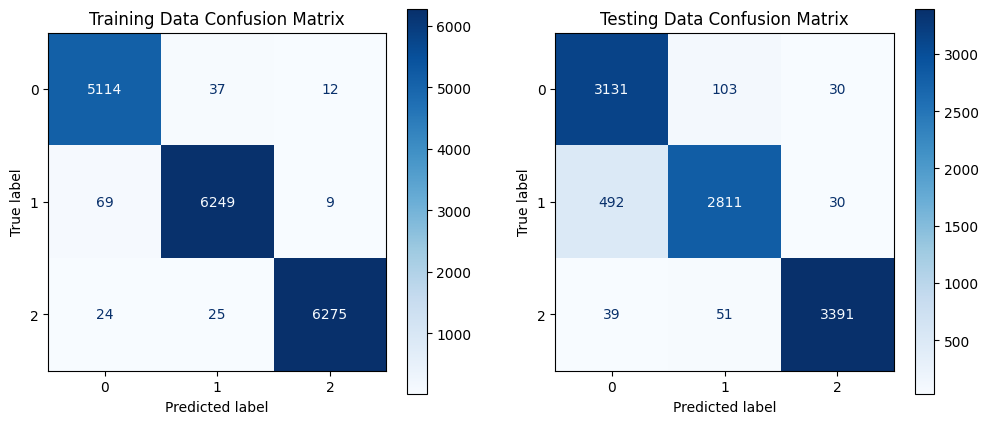

In [9]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict function to get predictions and labels
def get_predictions_and_labels(trainer, dataset):
    # Get predictions
    predictions, labels, _ = trainer.predict(dataset)

    # Convert predictions to label IDs (using argmax since it's a classification problem)
    pred_labels = np.argmax(predictions, axis=1)

    return pred_labels, labels

# Compute confusion matrix for training data
train_pred_labels, train_true_labels = get_predictions_and_labels(trainer, train_dataset)
cm_train = confusion_matrix(train_true_labels, train_pred_labels)

# Compute confusion matrix for testing data
test_pred_labels, test_true_labels = get_predictions_and_labels(trainer, test_dataset)
cm_test = confusion_matrix(test_true_labels, test_pred_labels)

# Print confusion matrices
print("Confusion Matrix for Training Data:")
print(cm_train)

print("\nConfusion Matrix for Testing Data:")
print(cm_test)

# Visualize confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for training data
ConfusionMatrixDisplay(cm_train).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Training Data Confusion Matrix')

# Plot for testing data
ConfusionMatrixDisplay(cm_test).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Testing Data Confusion Matrix')

plt.show()
